In [67]:
%matplotlib inline
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) SSBT vs Mantis
and more

In [36]:
input_file = '/home/fatemeh/projects/mantis/res.out'
df = pd.read_csv(input_file, sep=":", header=None, names=['oneCnt', 'eqClsCnt'])
num_samples = 2582

In [41]:
df = df.sort_values(by='eqClsCnt', ascending=False)
df.head()

,oneCnt,eqClsCnt
1177,2,20424957
1240,3,19626062
1234,4,15986416
1242,1,14577570
1238,5,12530958


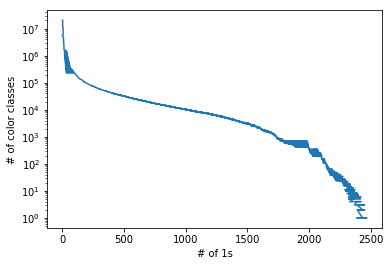

In [43]:
plt.plot(df.oneCnt, df.eqClsCnt)
plt.xlabel('# of 1s')
plt.ylabel('# of color classes')
plt.yscale('log')

In [24]:
psum = 0
cnt = 0
for idx, row in df.iterrows():
    psum += (row[0])*row[1]
    cnt += row[1]
print('total cnt: {} , average # of 1s: {}'.format(cnt, psum/cnt))

total cnt: 222584822 , average # of 1s: 96.21851250037166


In [7]:
input_file = '/mnt/scratch7/pufferfish_data/gencode.v25.pc_transcripts_fixed.fa'
output_file = '/mnt/scratch2/ssbt_experiment/gencode.v25.pc_transcripts_fixed_r1000.txt'
randNum = 1000

lst = []
with open(input_file, 'r') as f:
    for line in f:
        if line[0] == '>':
            txpName = line[1:-2]
        else:
            txpStr = line[:-2]
            lst += [[txpName, txpStr]]

txp_r = random.sample(lst, randNum)
with open(output_file, 'w') as f:
    for l in txp_r:
        f.write('{}\n'.format(l[1]))
        #f.write('>{}\n{}\n'.format(l[0], l[1]))


In [11]:
SSBT_res = '/mnt/scratch2/ssbt_experiment/test.out'
SSBT_res_reformated = '/mnt/scratch2/ssbt_experiment/test.reformated.out'

f = open(SSBT_res, 'r')
cntr = 1
with open(SSBT_res_reformated, 'w') as o:
    for line in f:
        if line[0] == '*':            
            o.write('{}'.format(cntr))
            cntr+=1;
        else:
            o.write(',{}'.format(line.split('/')[-1].split('\n')[0]))    

# 2) Hash-based Clustering
drawing the plots for hash-based clustering and distance distribution

# 2.1) Distance Distribution

In [213]:
def hashBasedClusteringStat(file_name, file_name2, title1, title2):
    ## random keeping
    #print("keep one bv randomly")
    print(title1)
    df = pd.read_csv(file_name, sep=" ", header=None, names=['dist', 'eqClsCnt'])
    eqCntSum = df.sum()['eqClsCnt']
    print('Total sum of remaining eq classes: {}'.format(eqCntSum))
    df['perc'] = round(df['eqClsCnt']*100/eqCntSum, 2)
    df = df.sort_values(['eqClsCnt', 'dist'], ascending=[0, 1])
    print(df.head(20))
    
    ## most popular
    #print("\nKeep the most popular bv")
    print('\n'+title2)
    popdf = pd.read_csv(file_name2, sep=" ", header=None, names=['dist', 'eqClsCnt'])
    eqCntSum = popdf.sum()['eqClsCnt']
    print('Total sum of remaining eq classes: {}'.format(eqCntSum))
    popdf['perc'] = round(popdf['eqClsCnt']*100/eqCntSum, 2)
    popdf = popdf.sort_values(['eqClsCnt', 'dist'], ascending=[0, 1])
    print(popdf.head(20))
    
    plt.figure(figsize=(30, 5))
    # the complete distribution
    plt.subplot(231)
    plt.plot(df.dist, df.perc)
    
    # plot the first 10 most common edit distance
    plt.subplot(232)
    plt.scatter(df.dist[:10], df.perc[:10])
    
    # plot the first 100 most common edit distance
    plt.subplot(233)
    plt.scatter(df.dist[:100], df.perc[:100])
    
    # keep the most popular one while colliding
    # the complete distribution
    plt.subplot(234)
    plt.plot(popdf.dist, popdf.perc)
    plt.xlabel('dist (zero means not found)')
    plt.ylabel('percentage of eq. classes with this hamming distance')
    
    # plot the first 10 most common edit distance
    plt.subplot(235)
    plt.scatter(popdf.dist[:10], popdf.perc[:10])
    plt.xlabel('dist (zero means not found)')
    
    # plot the first 100 most common edit distance
    plt.subplot(236)
    plt.scatter(popdf.dist[:100], popdf.perc[:100])
    plt.xlabel('dist (zero means not found)')
    

    # Accumulative percentage
    editDistSorted = df.sort_values('dist', ascending=1)
    editDistSorted['cum'] = np.cumsum(editDistSorted.perc)
    popeditDistSorted = popdf.sort_values('dist', ascending=1)
    popeditDistSorted['cum'] = np.cumsum(popeditDistSorted.perc)
    
    plt.figure(figsize=(20, 10))
    plt.subplot(221)
    plt.plot(editDistSorted.dist, editDistSorted.cum)
    plt.title(title1+': all')#'Keep One Randomly: all')
    
    plt.subplot(222)
    plt.plot(editDistSorted.dist[:30], editDistSorted.cum[:30], '--bo')
    plt.title(title1+': zoomed in for the first 30 most prevalent hamming distance')
    #Keep One Randomly
    plt.subplot(223)
    plt.plot(popeditDistSorted.dist, popeditDistSorted.cum)
    #plt.title('Keep Most Popular: all')
    plt.title(title2+': all')
    plt.xlabel('dist (zero means not found)')
    plt.ylabel('Cumulative percentage of eq. classes based on hamming distance')
    
    plt.subplot(224)
    plt.plot(popeditDistSorted.dist[:30], popeditDistSorted.cum[:30], '--bo')
    plt.title(title2+': zoomed in for the first 30 most prevalent hamming distance')
    plt.xlabel('dist (zero means not found)')
    

## 500k

keep one bv randomly
Total sum of remaining eq classes: 222084822
    dist  eqClsCnt  perc
4      4  13816083  6.22
5      5  12708160  5.72
3      3  12022044  5.41
6      6  11011749  4.96
7      7   9182012  4.13
8      8   8264288  3.72
9      9   7756452  3.49
10    10   7218576  3.25
2      2   6888291  3.10
11    11   6562034  2.95

Keep the most popular bv
Total sum of remaining eq classes: 222084822
    dist  eqClsCnt  perc
2      2  18828035  8.48
3      3  15843756  7.13
4      4  12077424  5.44
5      5  10090360  4.54
6      6   8865462  3.99
1      1   8675212  3.91
7      7   8188471  3.69
8      8   7569822  3.41
9      9   6901139  3.11
10    10   6167195  2.78


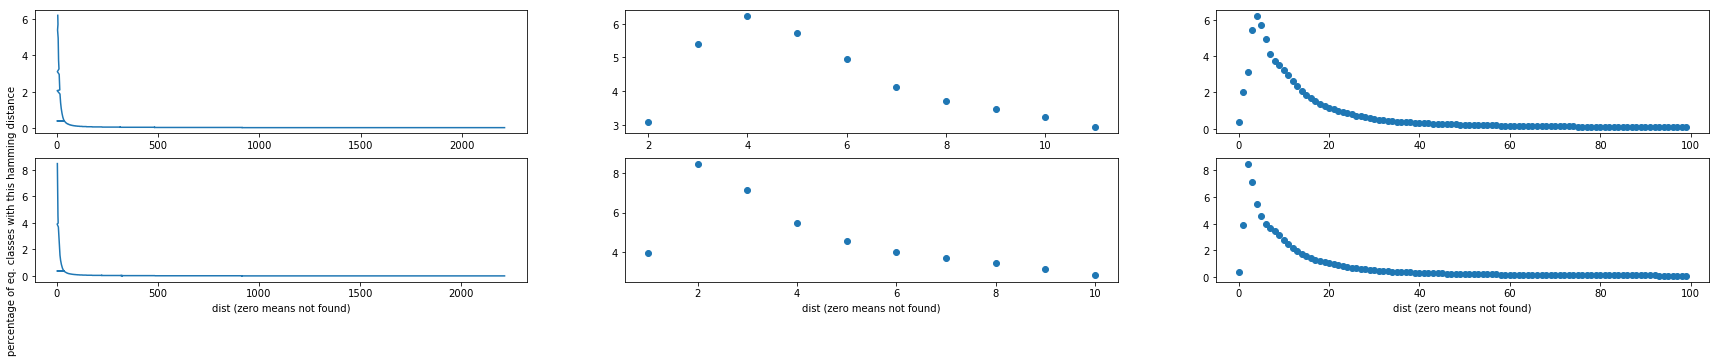

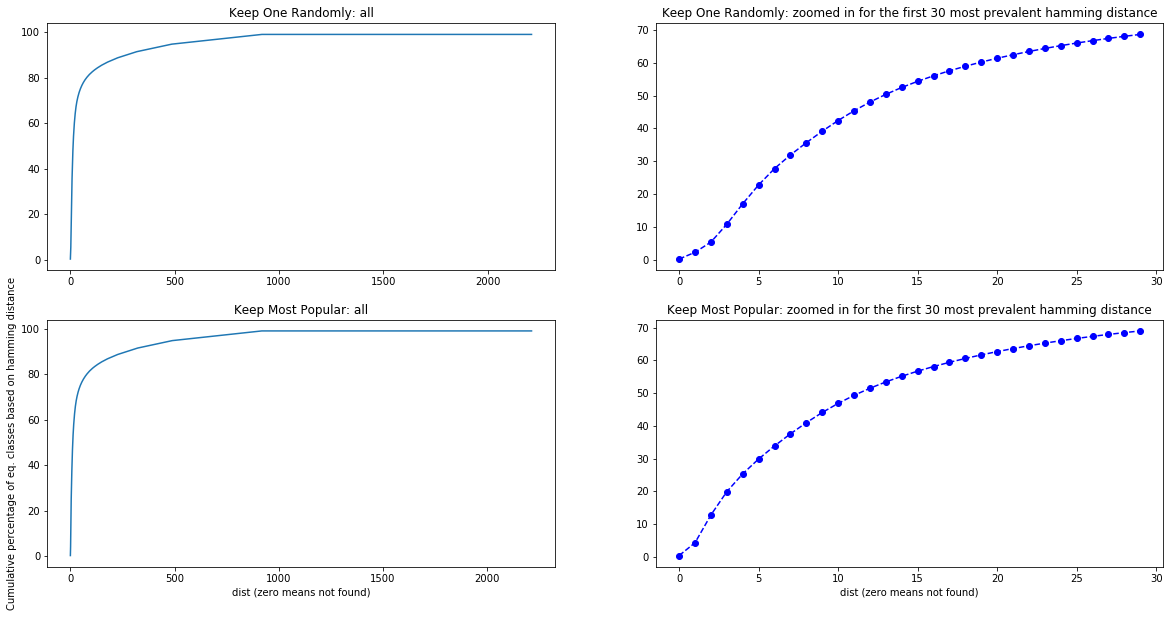

In [182]:
hashBasedClusteringStat('/home/fatemeh/projects/mantis/hash-clustering-500k.dist',
                       '/home/fatemeh/projects/mantis/mostPop-hash-clustering-500k.dist')

## 1M

keep one bv randomly
Total sum of remaining eq classes: 221584822
    dist  eqClsCnt  perc
6      6  13468336  6.08
5      5  13403175  6.05
7      7  11117075  5.02
8      8   9929922  4.48
9      9   9502825  4.29
4      4   9151321  4.13
10    10   9013135  4.07
11    11   8163201  3.68
12    12   7155902  3.23
13    13   6178082  2.79

Keep the most popular bv
Total sum of remaining eq classes: 221584822
    dist  eqClsCnt  perc
2      2  19125225  8.63
3      3  15982959  7.21
4      4  12120196  5.47
5      5  10056486  4.54
1      1   9043588  4.08
6      6   8781306  3.96
7      7   8130382  3.67
8      8   7548096  3.41
9      9   6897203  3.11
10    10   6169985  2.78


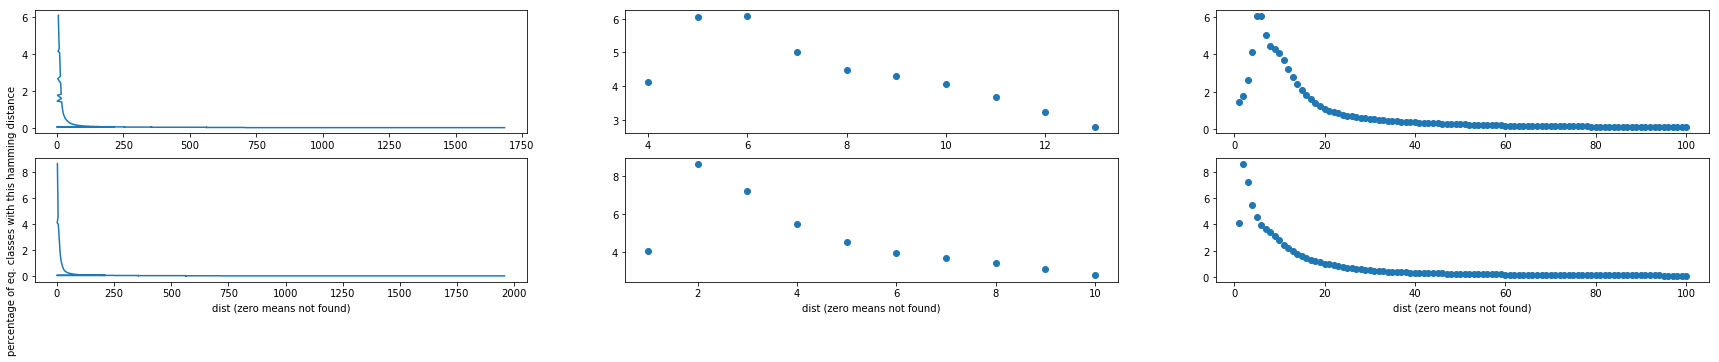

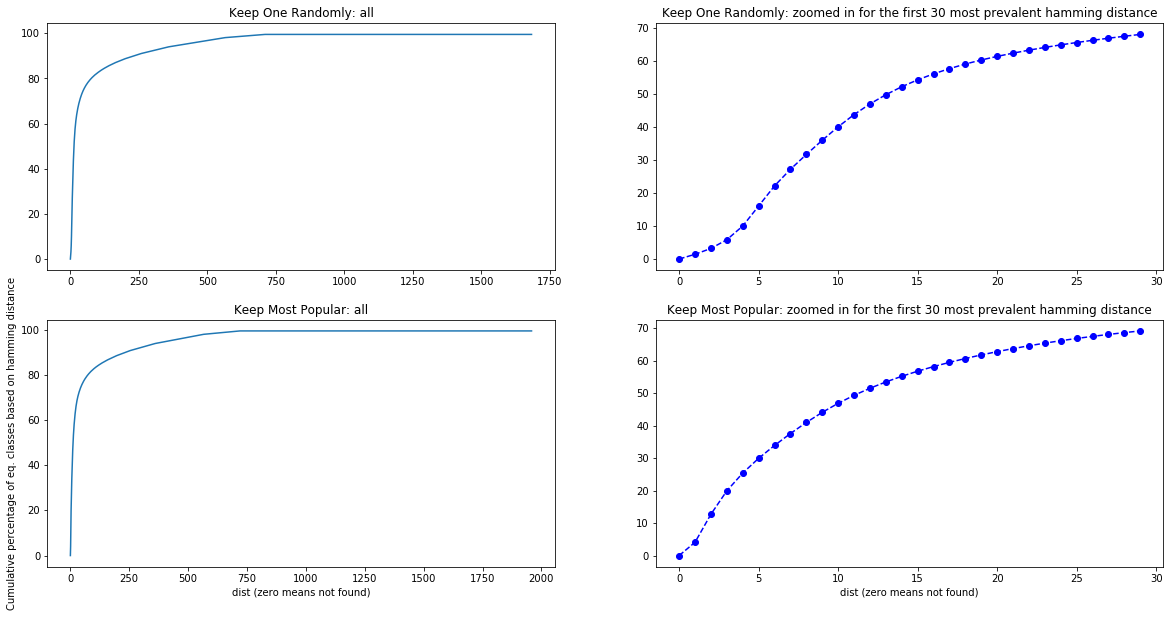

In [183]:
hashBasedClusteringStat('/home/fatemeh/projects/mantis/hash-clustering-1M.dist',
                       '/home/fatemeh/projects/mantis/mostPop-hash-clustering-1M.dist')

## 10M

keep one bv randomly
Total sum of remaining eq classes: 221584822
    dist  eqClsCnt  perc
6      6  13468336  6.08
5      5  13403175  6.05
7      7  11117075  5.02
8      8   9929922  4.48
9      9   9502825  4.29
4      4   9151321  4.13
10    10   9013135  4.07
11    11   8163201  3.68
12    12   7155902  3.23
13    13   6178082  2.79

Keep the most popular bv
Total sum of remaining eq classes: 221584822
    dist  eqClsCnt  perc
2      2  19125225  8.63
3      3  15982959  7.21
4      4  12120196  5.47
5      5  10056486  4.54
1      1   9043588  4.08
6      6   8781306  3.96
7      7   8130382  3.67
8      8   7548096  3.41
9      9   6897203  3.11
10    10   6169985  2.78


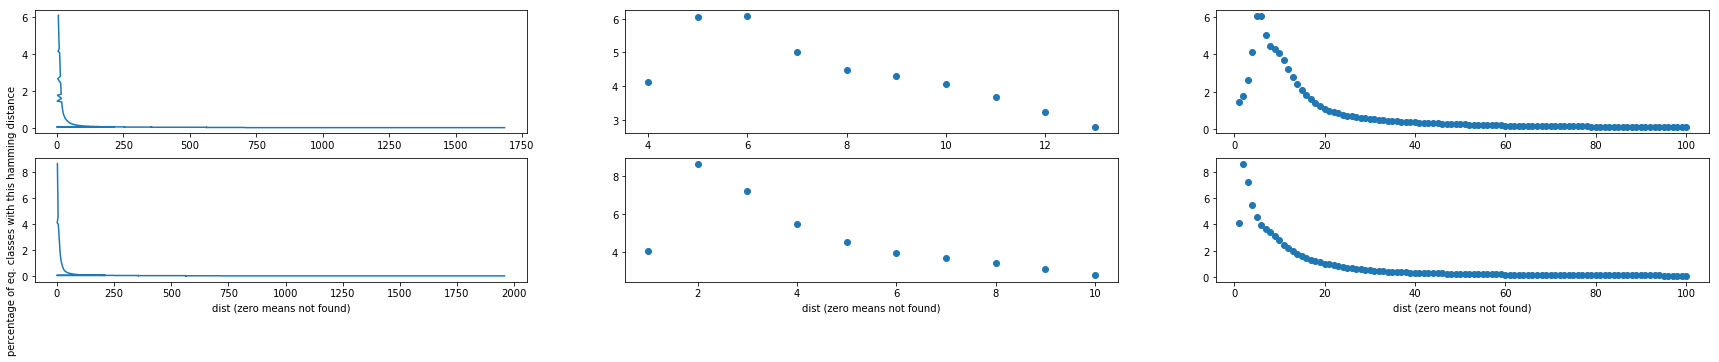

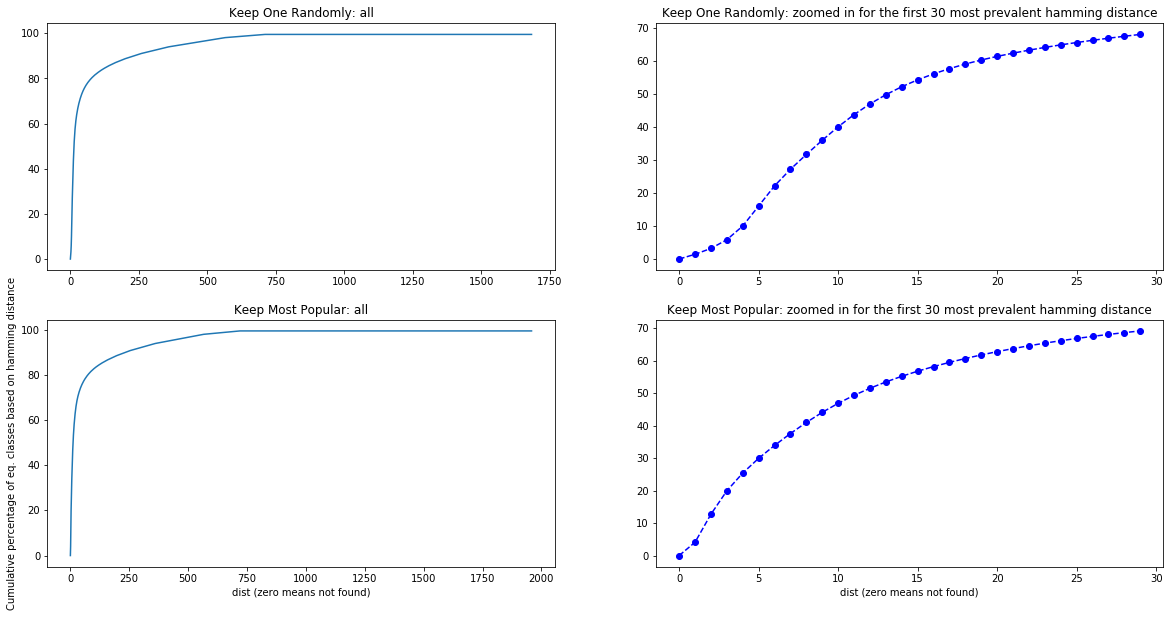

In [184]:
hashBasedClusteringStat('/home/fatemeh/projects/mantis/hash-clustering-1M.dist',
                       '/home/fatemeh/projects/mantis/mostPop-hash-clustering-1M.dist')

# 2.1) Collisions

In [195]:
def collisionStat(file_name):
    df = pd.read_csv(file_name, sep="," )
    #df.info()
    print(df.head(10))
    print(df.tail(3))
    df['coll-sum'] = df['CollisionCnt']*df['BlockCnt']
    print('average # of collisions: {}'.format(round(df['coll-sum'].sum()/df['BlockCnt'].sum())))
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    plt.plot(df['CollisionCnt'], df['BlockCnt'])
    plt.title('All collisions')
    plt.xlabel('Collision Count')
    plt.ylabel('# of Blocks with that many collision')
    plt.subplot(122)
    plt.scatter(df['CollisionCnt'][:100], df['BlockCnt'][:100])
    plt.title('Collisions up to 1000')
    plt.xlabel('Collision Count')
    plt.ylabel('# of Blocks with that many collision')
    plt.tight_layout()

## 500k

   CollisionCnt  BlockCnt
0             1    126147
1             2     10453
2             3      5193
3             4      3232
4             5      2148
5             6      1434
6             7       989
7             8       719
8             9       551
9            10       409
     CollisionCnt  BlockCnt
772        486868         1
773        487976         1
774        491850         1
average # of collisions: 67.0


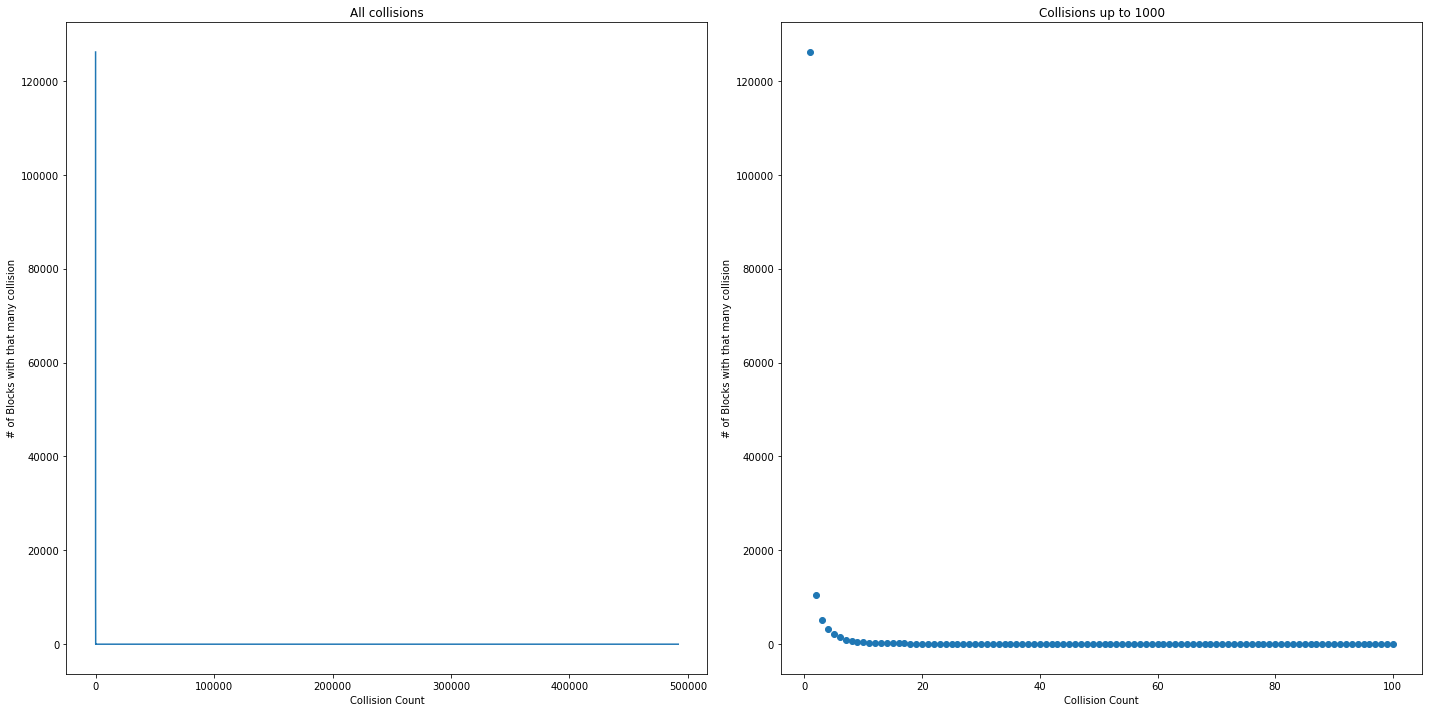

In [196]:
collisionStat('/home/fatemeh/projects/mantis/collisions-500000.dist')

## 1M

   CollisionCnt  BlockCnt
0             1    819414
1             2     39226
2             3     13113
3             4      7127
4             5      4715
5             6      3632
6             7      2857
7             8      2504
8             9      2203
9            10      1846
      CollisionCnt  BlockCnt
1101        943560         1
1102        947918         1
1103        949112         1
average # of collisions: 23.0


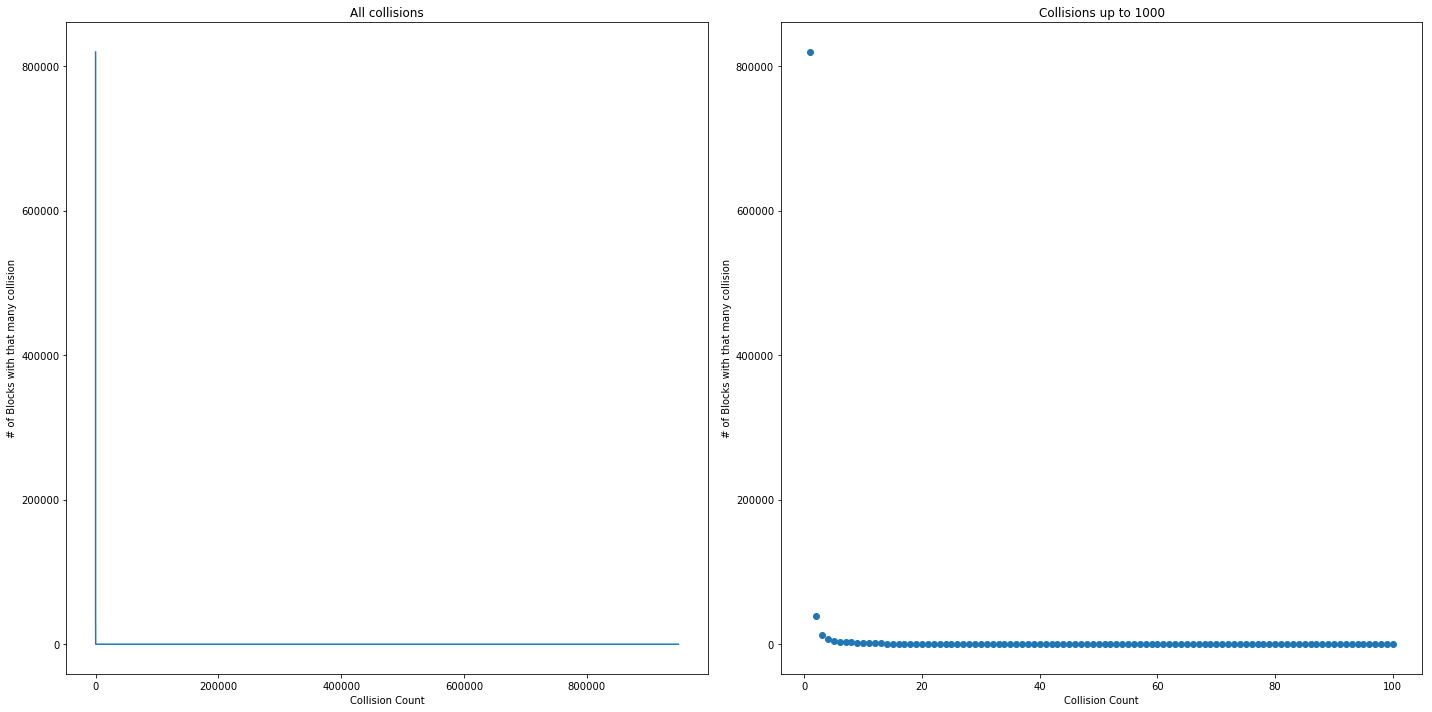

In [197]:
collisionStat('/home/fatemeh/projects/mantis/collisions-1000000.dist')

## 10M

   CollisionCnt  BlockCnt
0             1  15569203
1             2   1007134
2             3    293744
3             4    141137
4             5     79165
5             6     49548
6             7     34108
7             8     24853
8             9     19125
9            10     15372
      CollisionCnt  BlockCnt
3371       8607972         1
3372       9271061         1
3373       9274732         1
average # of collisions: 12.0


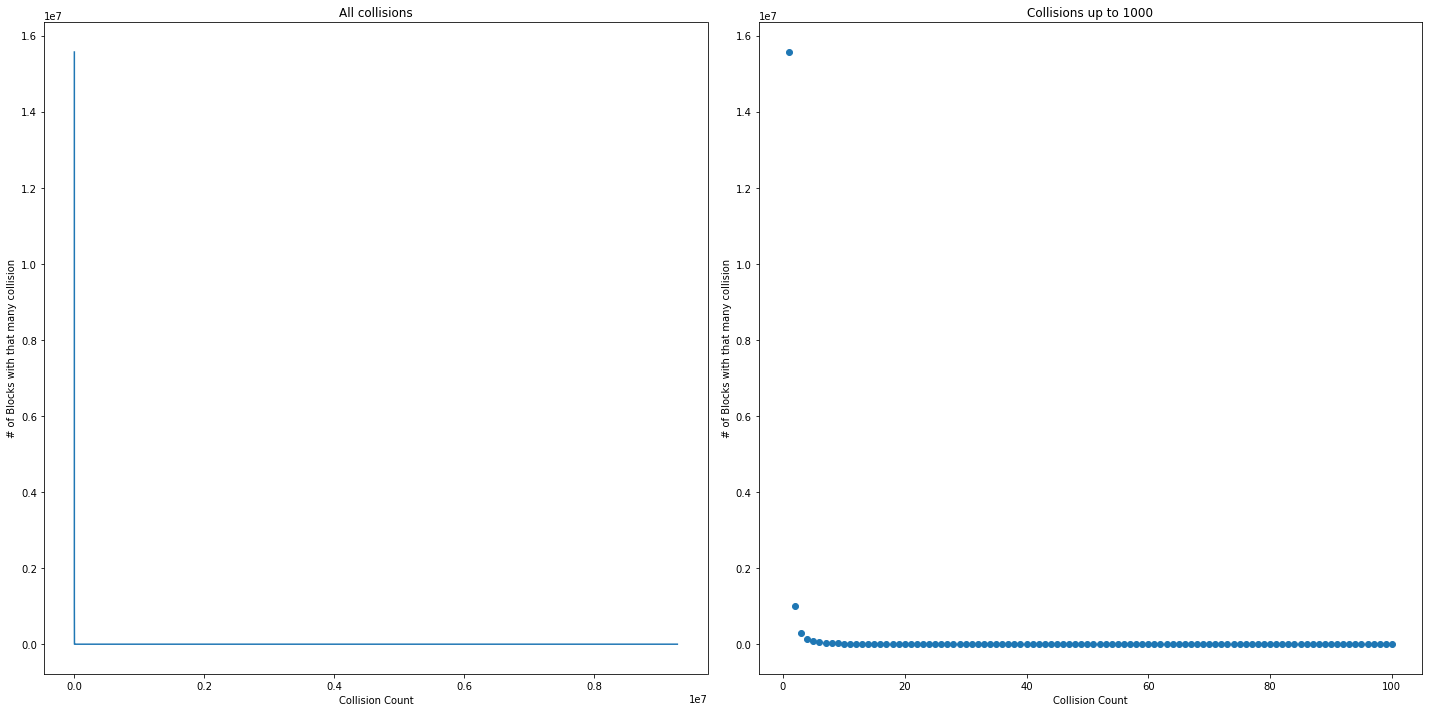

In [198]:
collisionStat('/home/fatemeh/projects/mantis/collisions-10000000.dist')

keep one bv randomly
Total sum of remaining eq classes: 1000
    dist  eqClsCnt  perc
2      2        84   8.4
3      3        80   8.0
4      4        67   6.7
5      5        43   4.3
1      1        43   4.3
7      7        38   3.8
6      6        35   3.5
8      8        32   3.2
9      9        27   2.7
10    10        24   2.4
12    12        24   2.4
11    11        23   2.3
14    14        17   1.7
16    16        17   1.7
15    15        14   1.4
20    20        14   1.4
13    13        13   1.3
19    19        12   1.2
28    28        10   1.0
22    22         9   0.9

Keep the most popular bv
Total sum of remaining eq classes: 1000
    dist  eqClsCnt  perc
0      1       116  11.6
1      2       112  11.2
2      3        89   8.9
3      4        67   6.7
4      5        53   5.3
5      6        44   4.4
6      7        27   2.7
13    14        20   2.0
7      8        19   1.9
8      9        18   1.8
15    16        15   1.5
10    11        14   1.4
11    12        13   1.

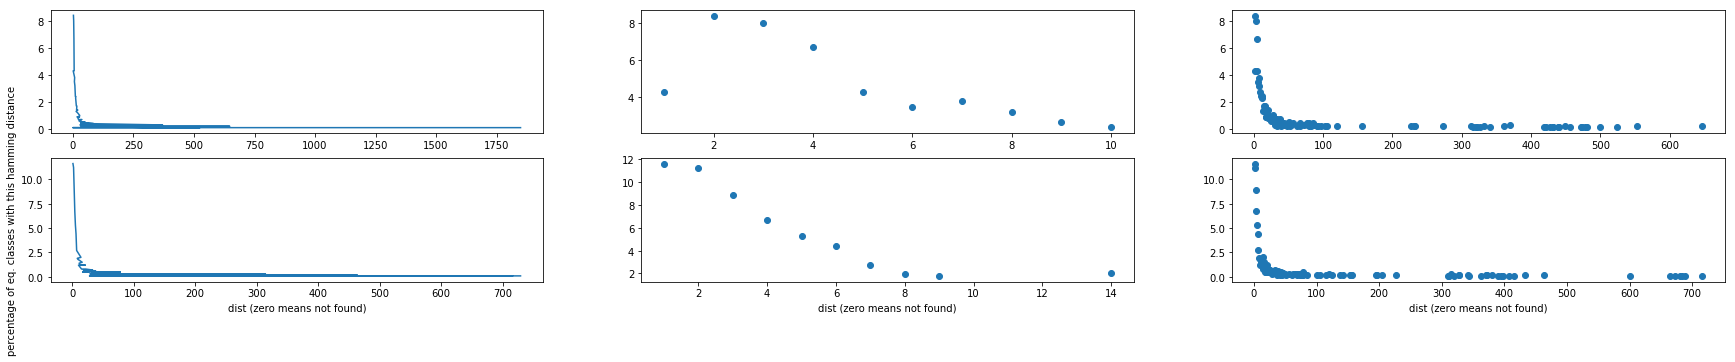

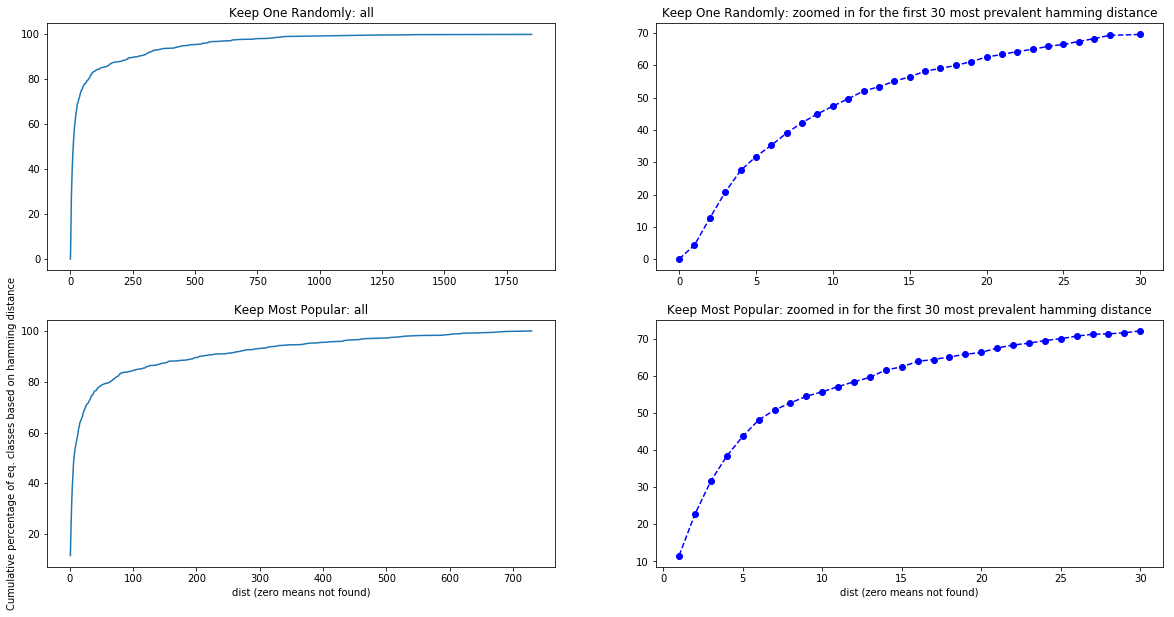

In [203]:
hashBasedClusteringStat('/home/fatemeh/projects/mantis/mostPop-hash-clustering-500k-1000.dist',
                       '/home/fatemeh/projects/mantis/bf-500000-1000.dist')

# Comparing for 1000 random non-popular
## keeping the most popular vs with brute-force

keep the most popular
Total sum of remaining eq classes: 1000
    dist  eqClsCnt  perc
2      2        84   8.4
3      3        80   8.0
4      4        67   6.7
1      1        43   4.3
5      5        43   4.3
7      7        38   3.8
6      6        35   3.5
8      8        32   3.2
9      9        27   2.7
10    10        24   2.4
12    12        24   2.4
11    11        23   2.3
14    14        17   1.7
16    16        17   1.7
15    15        14   1.4
20    20        14   1.4
13    13        13   1.3
19    19        12   1.2
28    28        10   1.0
17    17         9   0.9

brute force
Total sum of remaining eq classes: 1000
    dist  eqClsCnt  perc
0      1       116  11.6
1      2       112  11.2
2      3        89   8.9
3      4        67   6.7
4      5        53   5.3
5      6        44   4.4
6      7        27   2.7
13    14        20   2.0
7      8        19   1.9
8      9        18   1.8
15    16        15   1.5
10    11        14   1.4
11    12        13   1.3
9     10  

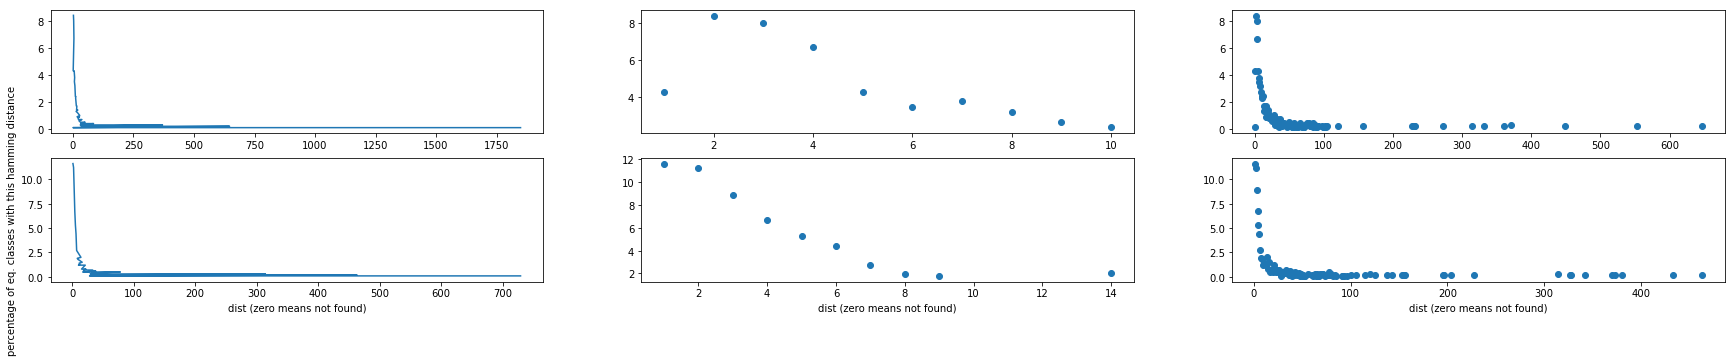

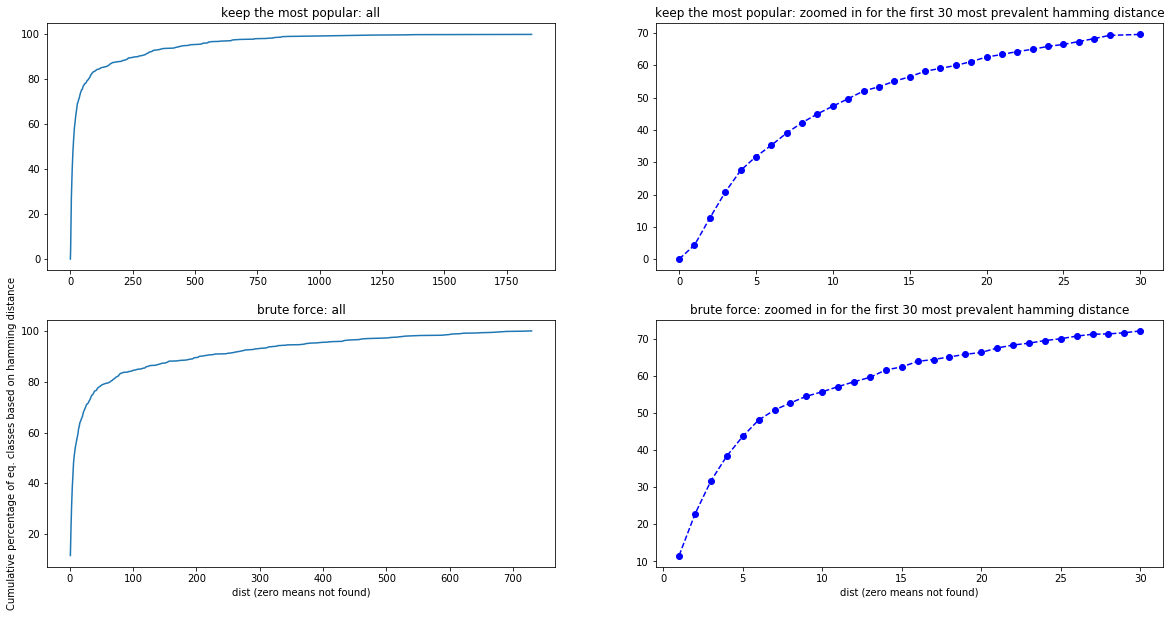

In [222]:
hashBasedClusteringStat('/home/fatemeh/projects/mantis/keepMostPop-500000-1000.dist',
                       '/home/fatemeh/projects/mantis/bf-500000-1000.dist',
                       'keep the most popular',
                       'brute force')

## Keeping All vs Brute Force

keep all in collision
Total sum of remaining eq classes: 1000
    dist  eqClsCnt  perc
1      1       116  11.6
2      2       112  11.2
3      3        89   8.9
4      4        67   6.7
5      5        53   5.3
6      6        44   4.4
7      7        27   2.7
14    14        20   2.0
8      8        19   1.9
9      9        18   1.8
16    16        15   1.5
11    11        14   1.4
12    12        13   1.3
10    10        12   1.2
13    13        12   1.2
21    21        12   1.2
15    15         8   0.8
22    22         8   0.8
18    18         7   0.7
19    19         7   0.7

brute force
Total sum of remaining eq classes: 1000
    dist  eqClsCnt  perc
0      1       116  11.6
1      2       112  11.2
2      3        89   8.9
3      4        67   6.7
4      5        53   5.3
5      6        44   4.4
6      7        27   2.7
13    14        20   2.0
7      8        19   1.9
8      9        18   1.8
15    16        15   1.5
10    11        14   1.4
11    12        13   1.3
9     10  

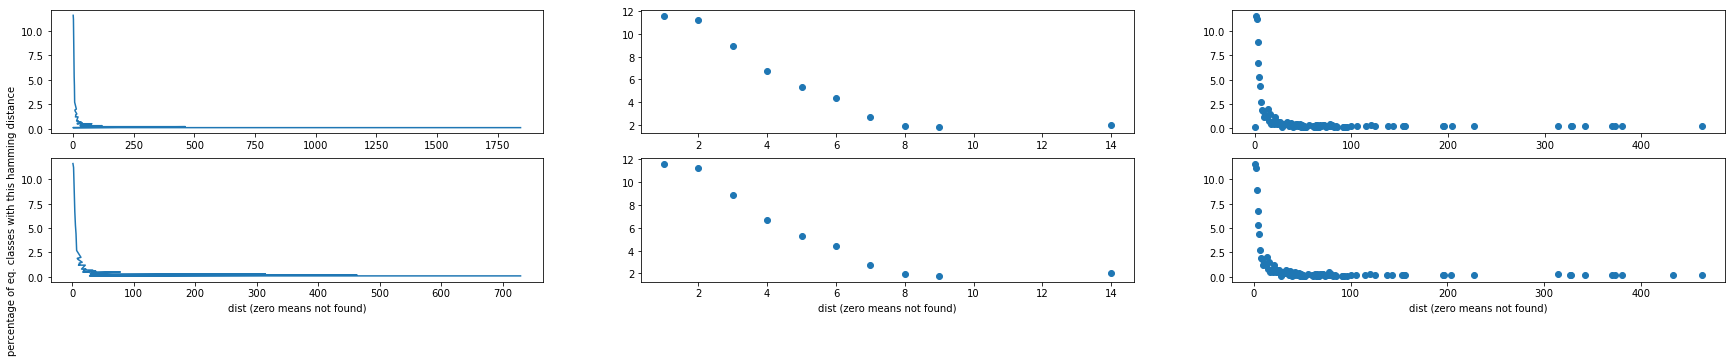

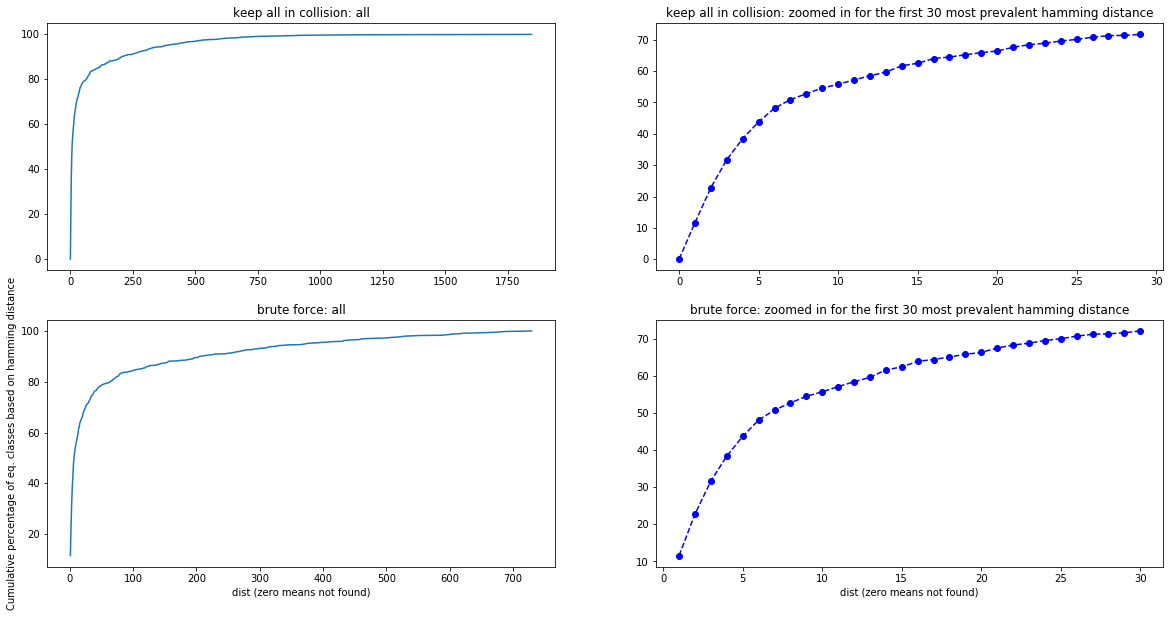

In [217]:
hashBasedClusteringStat('/home/fatemeh/projects/mantis/keepAll-500000-1000.dist',
                       '/home/fatemeh/projects/mantis/bf-500000-1000.dist',
                       'keep all in collision',
                       'brute force')

keep max score in collision
Total sum of remaining eq classes: 1000
    dist  eqClsCnt  perc
1      1       116  11.6
2      2        88   8.8
3      3        81   8.1
4      4        62   6.2
5      5        43   4.3
6      6        41   4.1
7      7        31   3.1
8      8        25   2.5
9      9        21   2.1
15    15        20   2.0
10    10        18   1.8
13    13        16   1.6
12    12        15   1.5
21    21        12   1.2
11    11        11   1.1
16    16        11   1.1
14    14         9   0.9
17    17         9   0.9
18    18         9   0.9
19    19         9   0.9

brute force
Total sum of remaining eq classes: 1000
    dist  eqClsCnt  perc
0      1       116  11.6
1      2       112  11.2
2      3        89   8.9
3      4        67   6.7
4      5        53   5.3
5      6        44   4.4
6      7        27   2.7
13    14        20   2.0
7      8        19   1.9
8      9        18   1.8
15    16        15   1.5
10    11        14   1.4
11    12        13   1.3
9   

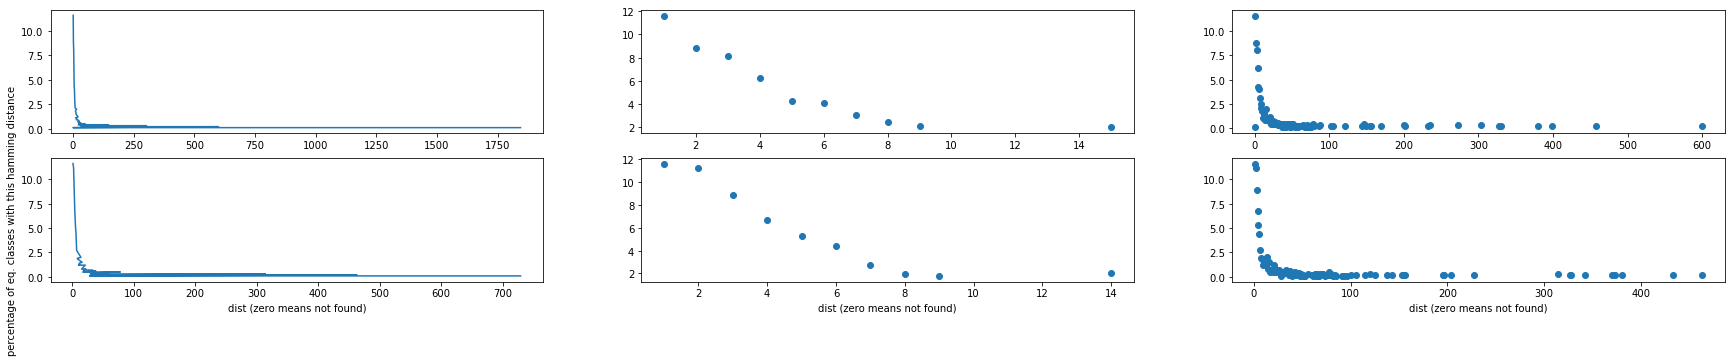

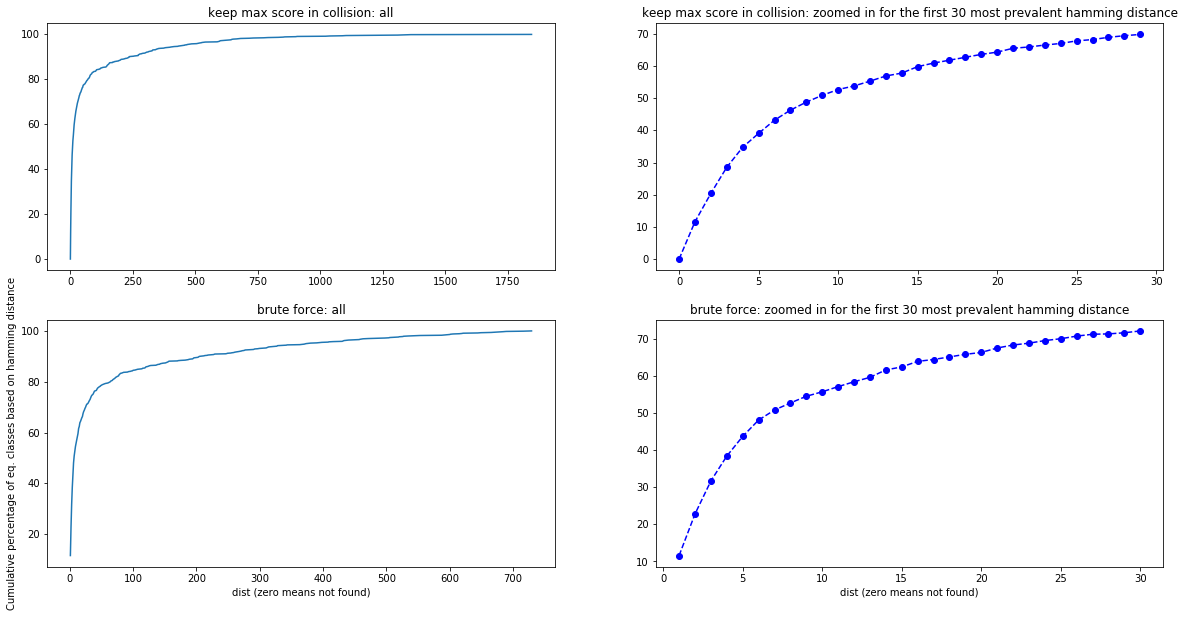

In [219]:
hashBasedClusteringStat('/home/fatemeh/projects/mantis/keepMaxScore-500000-1000.dist',
                       '/home/fatemeh/projects/mantis/bf-500000-1000.dist',
                       'keep max score in collision',
                       'brute force')

# Comparing Different Approaches for Querying 500k with Max Frequency

In [285]:
mostPop_df = pd.read_csv('/home/fatemeh/projects/mantis/keepMostPop-500000-1000.dist', sep=" ", header=None, names=['dist', 'eqClsCnt'])
mostPop_df.columns = ['dist', 'mostPop_cnt']
maxScore_df = pd.read_csv('/home/fatemeh/projects/mantis/keepMaxScore-500000-1000.dist', sep=" ", header=None, names=['dist', 'eqClsCnt']) 
maxScore_df.columns = ['dist', 'maxScore_cnt']
all_df = pd.read_csv('/home/fatemeh/projects/mantis/keepAll-500000-1000.dist', sep=" ", header=None, names=['dist', 'eqClsCnt'])
all_df.columns = ['dist', 'all_cnt']
bf_df = pd.read_csv('/home/fatemeh/projects/mantis/bf-500000-1000.dist', sep=" ", header=None, names=['dist', 'eqClsCnt'])
bf_df.columns = ['dist', 'bf_cnt']

In [287]:
mm = pd.merge(mostPop_df, maxScore_df, how='outer', on=['dist'])
mmall = pd.merge(mm, all_df, how='outer', on=['dist'])
mmallbf = pd.merge(mmall, bf_df, how='outer', on=['dist'])
mmallbf = mmallbf.sort_values('dist', ascending=1).reset_index().drop('index', axis=1)
mmallbf['cum_mostPop_cnt'] = np.cumsum(mmallbf['mostPop_cnt'])/1000
mmallbf['cum_maxScore_cnt'] = np.cumsum(mmallbf['maxScore_cnt'])/1000
mmallbf['cum_all_cnt'] = np.cumsum(mmallbf['all_cnt'])/1000
mmallbf['cum_bf_cnt'] = np.cumsum(mmallbf['bf_cnt'])/1000

In [288]:
mmallbf

,dist,mostPop_cnt,maxScore_cnt,all_cnt,bf_cnt,cum_mostPop_cnt,cum_maxScore_cnt,cum_all_cnt,cum_bf_cnt
0,0,1.0,1.0,1.0,NaN,0.001,0.001,0.001,NaN
1,1,43.0,116.0,116.0,116.0,0.044,0.117,0.117,0.116
2,2,84.0,88.0,112.0,112.0,0.128,0.205,0.229,0.228
3,3,80.0,81.0,89.0,89.0,0.208,0.286,0.318,0.317
4,4,67.0,62.0,67.0,67.0,0.275,0.348,0.385,0.384
5,5,43.0,43.0,53.0,53.0,0.318,0.391,0.438,0.437
6,6,35.0,41.0,44.0,44.0,0.353,0.432,0.482,0.481
7,7,38.0,31.0,27.0,27.0,0.391,0.463,0.509,0.508
8,8,32.0,25.0,19.0,19.0,0.423,0.488,0.528,0.527
9,9,27.0,21.0,18.0,18.0,0.450,0.509,0.546,0.545


In [289]:
mmallbf[np.isnan(mmallbf['bf_cnt']) & ~np.isnan(mmallbf['all_cnt'])]

,dist,mostPop_cnt,maxScore_cnt,all_cnt,bf_cnt,cum_mostPop_cnt,cum_maxScore_cnt,cum_all_cnt,cum_bf_cnt
0,0,1.0,1.0,1.0,NaN,0.001,0.001,0.001,NaN
238,303,1.0,3.0,1.0,NaN,0.913,0.920,0.930,NaN
247,315,NaN,NaN,1.0,NaN,NaN,NaN,0.936,NaN
366,732,NaN,1.0,1.0,NaN,NaN,0.984,0.990,NaN
369,740,NaN,NaN,1.0,NaN,NaN,NaN,0.991,NaN
373,790,NaN,1.0,1.0,NaN,NaN,0.986,0.992,NaN
378,832,1.0,1.0,1.0,NaN,0.987,0.987,0.993,NaN
383,858,NaN,1.0,1.0,NaN,NaN,0.989,0.994,NaN
385,902,NaN,1.0,1.0,NaN,NaN,0.990,0.995,NaN
387,920,NaN,NaN,1.0,NaN,NaN,NaN,0.996,NaN


In [290]:
mmallbf[np.isnan(mmallbf['bf_cnt']) & ~np.isnan(mmallbf['maxScore_cnt'])]

,dist,mostPop_cnt,maxScore_cnt,all_cnt,bf_cnt,cum_mostPop_cnt,cum_maxScore_cnt,cum_all_cnt,cum_bf_cnt
0,0,1.0,1.0,1.0,NaN,0.001,0.001,0.001,NaN
41,41,3.0,3.0,NaN,NaN,0.741,0.743,NaN,NaN
46,46,NaN,2.0,NaN,NaN,NaN,0.757,NaN,NaN
54,54,1.0,1.0,NaN,NaN,0.775,0.776,NaN,NaN
55,55,1.0,2.0,NaN,NaN,0.776,0.778,NaN,NaN
57,57,4.0,1.0,NaN,NaN,0.781,0.779,NaN,NaN
58,58,NaN,1.0,NaN,NaN,NaN,0.780,NaN,NaN
59,59,NaN,2.0,NaN,NaN,NaN,0.782,NaN,NaN
62,62,2.0,2.0,NaN,NaN,0.785,0.788,NaN,NaN
70,70,1.0,3.0,NaN,NaN,0.797,0.802,NaN,NaN


In [291]:
mmallbf[np.isnan(mmallbf['bf_cnt']) & ~np.isnan(mmallbf['mostPop_cnt'])]

,dist,mostPop_cnt,maxScore_cnt,all_cnt,bf_cnt,cum_mostPop_cnt,cum_maxScore_cnt,cum_all_cnt,cum_bf_cnt
0,0,1.0,1.0,1.0,NaN,0.001,0.001,0.001,NaN
41,41,3.0,3.0,NaN,NaN,0.741,0.743,NaN,NaN
54,54,1.0,1.0,NaN,NaN,0.775,0.776,NaN,NaN
55,55,1.0,2.0,NaN,NaN,0.776,0.778,NaN,NaN
57,57,4.0,1.0,NaN,NaN,0.781,0.779,NaN,NaN
62,62,2.0,2.0,NaN,NaN,0.785,0.788,NaN,NaN
70,70,1.0,3.0,NaN,NaN,0.797,0.802,NaN,NaN
76,76,4.0,1.0,NaN,NaN,0.806,0.808,NaN,NaN
81,81,3.0,1.0,NaN,NaN,0.818,0.821,NaN,NaN
87,87,3.0,3.0,NaN,NaN,0.828,0.830,NaN,NaN


# Random 500k Instead of Max Frequencies

In [282]:
mostPop_df = pd.read_csv('/home/fatemeh/projects/mantis/rand-keepMostPop-500000-1000.dist', sep=" ", header=None, names=['dist', 'eqClsCnt'])
mostPop_df.columns = ['dist', 'r_mostPop_cnt']
maxScore_df = pd.read_csv('/home/fatemeh/projects/mantis/rand-keepAll-500000-1000.dist', sep=" ", header=None, names=['dist', 'eqClsCnt']) 
maxScore_df.columns = ['dist', 'r_all_cnt']
all_df = pd.read_csv('/home/fatemeh/projects/mantis/rand-bf-500000-1000.dist', sep=" ", header=None, names=['dist', 'eqClsCnt'])
all_df.columns = ['dist', 'r_bf_cnt']
bf_df = pd.read_csv('/home/fatemeh/projects/mantis/bf-500000-1000.dist', sep=" ", header=None, names=['dist', 'eqClsCnt'])
bf_df.columns = ['dist', 'bf_cnt']
mm = pd.merge(mostPop_df, maxScore_df, how='outer', on=['dist'])
mmall = pd.merge(mm, all_df, how='outer', on=['dist'])
rand_mmallbf = pd.merge(mmall, bf_df, how='outer', on=['dist'])
rand_mmallbf = rand_mmallbf.sort_values('dist', ascending=1).reset_index().drop('index', axis=1)
rand_mmallbf['rcum_mostPop_cnt'] = np.cumsum(rand_mmallbf['r_mostPop_cnt'])/1000
rand_mmallbf['rcum_all_cnt'] = np.cumsum(rand_mmallbf['r_all_cnt'])/1000
rand_mmallbf['rcum_bf_cnt'] = np.cumsum(rand_mmallbf['r_bf_cnt'])/1000
rand_mmallbf['cum_bf_cnt'] = np.cumsum(rand_mmallbf['bf_cnt'])/1000

In [283]:
rand_mmallbf

,dist,r_mostPop_cnt,r_all_cnt,r_bf_cnt,bf_cnt,rcum_mostPop_cnt,rcum_all_cnt,rcum_bf_cnt,cum_bf_cnt
0,0,0.0,0.0,NaN,NaN,0.000,0.000,NaN,NaN
1,1,NaN,6.0,6.0,116.0,NaN,0.006,0.006,0.116
2,2,NaN,76.0,76.0,112.0,NaN,0.082,0.082,0.228
3,3,2.0,143.0,143.0,89.0,0.002,0.225,0.225,0.317
4,4,10.0,118.0,118.0,67.0,0.012,0.343,0.343,0.384
5,5,51.0,73.0,73.0,53.0,0.063,0.416,0.416,0.437
6,6,69.0,48.0,48.0,44.0,0.132,0.464,0.464,0.481
7,7,73.0,32.0,32.0,27.0,0.205,0.496,0.496,0.508
8,8,63.0,27.0,27.0,19.0,0.268,0.523,0.523,0.527
9,9,43.0,23.0,23.0,18.0,0.311,0.546,0.546,0.545
